## 다변수 표현

In [1]:
import pandas as pd
df_rentalcars = pd.read_csv('../../datasets/LetalCarOfContractType.csv')
df_rentalcars.head(3)

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0
2,66756657,렌탈,Normal,홈쇼핑/방송,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,8.0,우리은행,정상,60.0,2363.0


In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl # 한글 폰트 설정 (NanumGothic) 
mpl.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

### x:범주 / y:연속
- 막대 그래프(barplot)
- 상자 그래프(boxplot)

<Axes: xlabel='channel', ylabel='amount'>

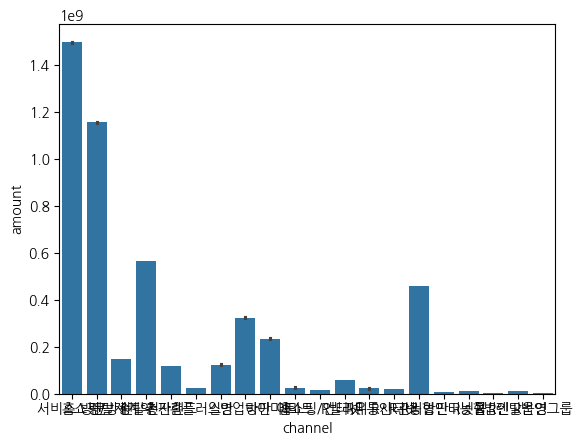

In [4]:
import seaborn as sns
#sns.barplot(data=df_rentalcars, x='channel', y='amount')   # count
sns.barplot(data=df_rentalcars, x='channel', y='amount',estimator=sum)    #sum


#### boxplot
- 각 feature들 단위가 유사한 것 끼리 표현

In [6]:
df_rentalcars_channel_amount_sum = pd.pivot_table(data=df_rentalcars, index='channel', values='amount', aggfunc=sum)
df_rentalcars_channel_amount_sum

/tmp/ipykernel_5788/3207477041.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_rentalcars_channel_amount_sum = pd.pivot_table(data=df_rentalcars, index='channel', values='amount', aggfunc=sum)


,amount
channel,
R관리방판,458556039
R농협,11337960
R농협인터넷몰,6350700
R렌탈운영,11808300
R법인,2114700
R법인그룹,2099400
R빌리미,58267200
R유통사,22374090
R인터넷,20479800


In [12]:
df_rentalcars_channel_amount_sum_sort = df_rentalcars_channel_amount_sum.sort_values(by='amount',ascending=False)
df_rentalcars_channel_amount_sum_sort[:5]

,amount
channel,
서비스 방문,1496420760
홈쇼핑/방송,1156173900
렌탈총판,565189800
R관리방판,458556039
영업방판,322955100


In [13]:
df_rentalcars_channel_amount_sum_sort.reset_index(inplace=True)

In [14]:
df_rentalcars_channel_amount_sum_sort.head(5)

,channel,amount
0,서비스 방문,1496420760
1,홈쇼핑/방송,1156173900
2,렌탈총판,565189800
3,R관리방판,458556039
4,영업방판,322955100


<Axes: xlabel='channel', ylabel='amount'>

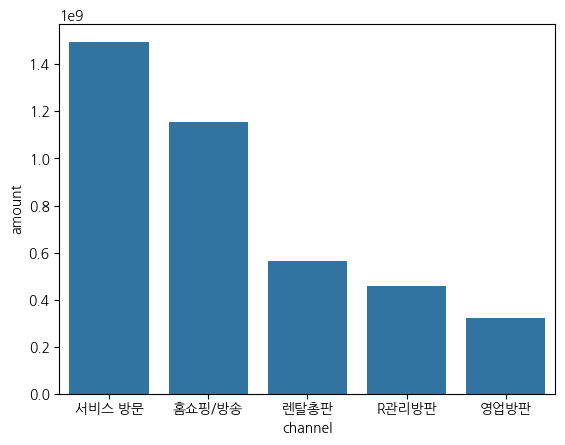

In [19]:
sns.barplot(data=df_rentalcars_channel_amount_sum_sort.head(5)
            ,x='channel', y='amount')

In [23]:
df_rentalcars_channel_amount_sum_sort_list = df_rentalcars_channel_amount_sum_sort.head(5)['channel'].values.tolist()
df_rentalcars_channel_amount_sum_sort_list

['서비스 방문', '홈쇼핑/방송', '렌탈총판', 'R관리방판', '영업방판']

<Axes: xlabel='channel', ylabel='amount'>

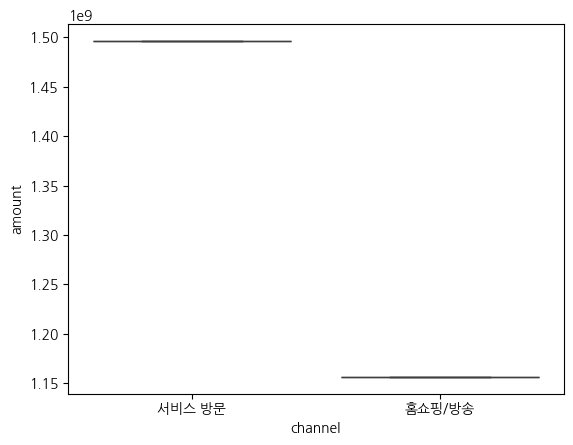

In [ ]:
sns.boxplot(data=df_rentalcars_channel_amount_sum_sort.head(5)
            , x='channel', y='amount'
            #,order=['서비스 방문', '홈쇼핑/방송']
            ,order=['서비스 방문', '홈쇼핑/방송'])

### x: 연속/ Y:연속
- 산점도(xcatterplot), 회귀그래프(lmplot), 히트맵(pairplot), 확률밀도(kdeplot)

<Axes: xlabel='Mileage', ylabel='age'>

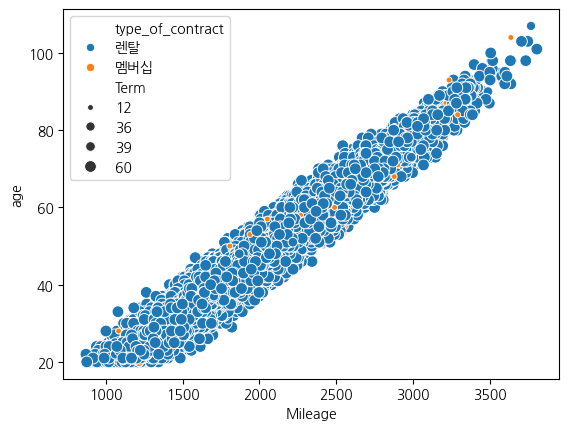

In [29]:
#sns.scatterplot(data=df_rentalcars, x='Mileage',y='age' ,hue='type_of_contract')
sns.scatterplot(data=df_rentalcars, x='Mileage',y='age' ,hue='type_of_contract',size='Term')

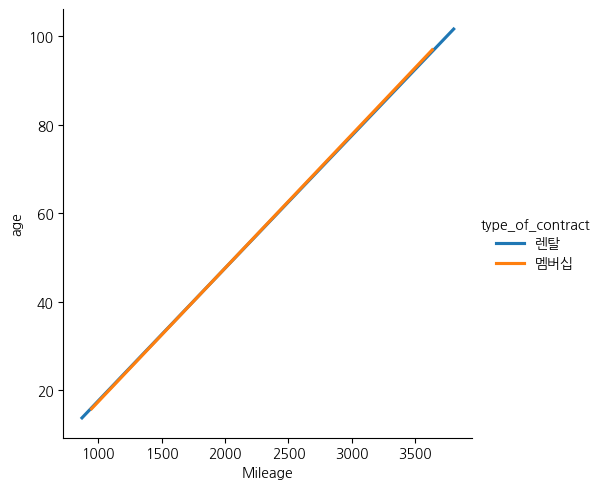

In [31]:
#sns.lmplot(data=df_rentalcars, x='Mileage',y='age' ,hue='type_of_contract')
sns.lmplot(data=df_rentalcars, x='Mileage',y='age' ,hue='type_of_contract', scatter=False)


In [33]:
df_rentalcars[['Term','amount','age','Mileage']].corr()

,Term,amount,age,Mileage
Term,1.000000,0.465662,-0.008474,-0.007871
amount,0.465662,1.000000,-0.003537,-0.004146
age,-0.008474,-0.003537,1.000000,0.973281
Mileage,-0.007871,-0.004146,0.973281,1.000000


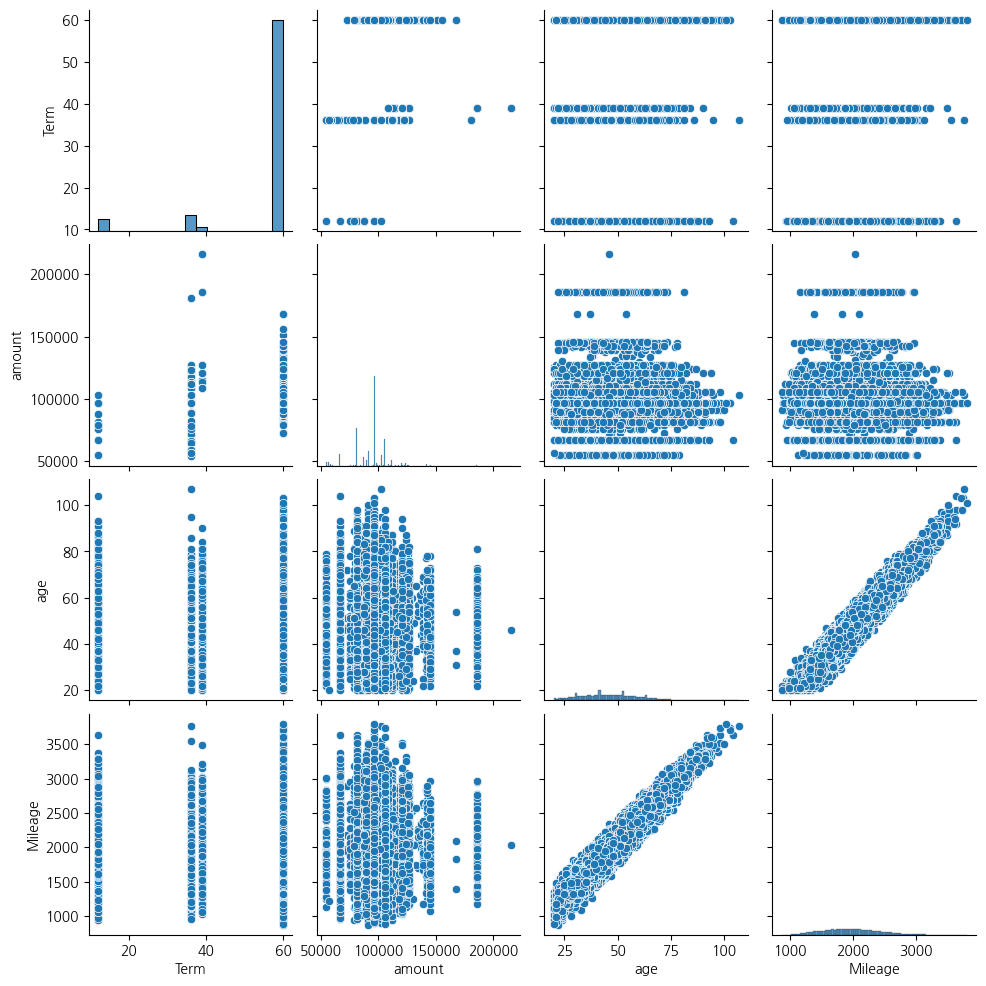

In [35]:
sns.pairplot(data=df_rentalcars[['Term','amount','age','Mileage']])

### x : 시계열(순서) / y : 연속형

In [40]:
df_rentalcars['datetime'] = pd.to_datetime(df_rentalcars['datetime'])
df_rentalcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51304 entries, 0 to 51303
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 51304 non-null  int64         
 1   type_of_contract   51300 non-null  object        
 2   type_of_contract2  51303 non-null  object        
 3   channel            51304 non-null  object        
 4   datetime           51304 non-null  datetime64[ns]
 5   Term               51304 non-null  int64         
 6   payment_type       51304 non-null  object        
 7   product            51303 non-null  object        
 8   amount             51304 non-null  int64         
 9   state              51304 non-null  object        
 10  overdue_count      51304 non-null  int64         
 11  overdue            51302 non-null  object        
 12  credit rating      42521 non-null  float64       
 13  bank               48544 non-null  object        
 14  cancel

<Axes: xlabel='datetime', ylabel='amount'>

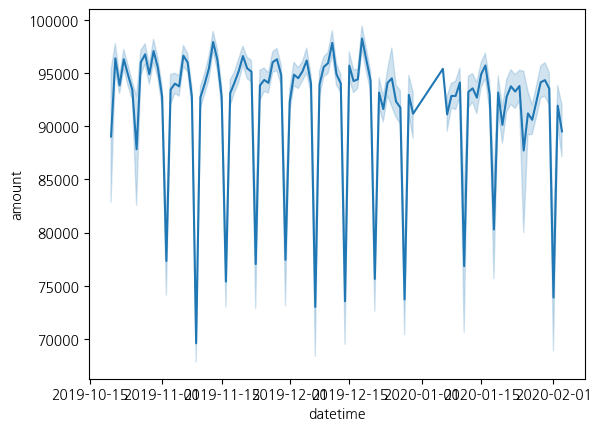

In [38]:
sns.lineplot(data=df_rentalcars, x='datetime', y='amount')